In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [0]:
import seaborn as sns
sns.set()

In [2]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [5]:
df = pd.read_csv('data/men_shoes.csv', low_memory=False)
df.shape

(18280, 48)

In [6]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [7]:
mean_price = np.mean( df['prices_amountmin'])
mean_price

93.53952188183217

In [8]:
[1] * 5

[1, 1, 1, 1, 1]

In [9]:
y_true = df['prices_amountmin']
y_pred = [mean_price] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

63.968341227870624

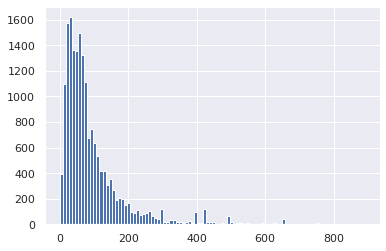

In [10]:
df['prices_amountmin'].hist(bins=100)

In [11]:
np.log(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

In [12]:
np.log(0+1)

0.0

In [13]:
np.log1p(0)

0.0

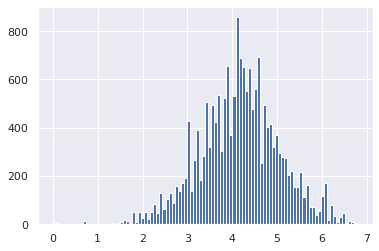

In [14]:
np.log1p(df['prices_amountmin']).hist(bins=100)

In [15]:
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.01120240700219

In [17]:
y_true = df['prices_amountmin']
price_log_mean = np.mean( np.log1p(y_true))
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

89.39727212160223

In [18]:
np.exp(np.mean(np.log1p(y_true)))-1

62.92811169273113

In [19]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1(np.mean(np.log1p(y_true)))
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [20]:
df.brand.value_counts()

Nike                     1709
PUMA                      574
Ralph Lauren              524
New Balance               361
VANS                      356
                         ... 
Paul Smith                  1
Adtec                       1
Customised_Perfection       1
SOD                         1
Handmadecraft               1
Name: brand, Length: 1856, dtype: int64

In [0]:
df['brand_cat'] =df['brand'].factorize()[0] #faktoryzacja z danych kategorycznych na liczbowe

In [22]:
feats = ['brand_cat']
X=df[feats].values
y=df['prices_amountmin'].values

model= DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [0]:
feats = ['brand_cat']
def run_model(feats):
    X=df[feats].values
    y=df['prices_amountmin'].values

    model= DecisionTreeRegressor(max_depth=5)

    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
    return np.mean(scores), np.std(scores)

In [24]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [0]:
df['manufacturer_cat'] =df['manufacturer'].factorize()[0] #faktoryzacja z danych kategorycznych na liczbowe

In [26]:
run_model(['manufacturer_cat'])

(-63.133649278023746, 3.394307434888982)

In [27]:
run_model(['manufacturer_cat', 'brand_cat'])

(-58.539304199085976, 4.3112232316154415)

In [29]:
ls matrix_one

day3.ipynb  day4.ipynb


In [0]:
!git add matrix_one/day4.ipynb

In [0]:
!git commit -m "Simple model"

In [0]:
!git pus